In [1]:
# importing the libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


In [2]:
# import file
df=pd.read_csv('Australian_Vehicle_Prices.csv')
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
data=pd.read_csv('Australian_Vehicle_Prices.csv')

In [4]:
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [6]:
df.shape

(16734, 19)

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14586 non-null  object 
 1   Year               14586 non-null  float64
 2   Model              14586 non-null  object 
 3   Car/Suv            14586 non-null  object 
 4   Title              14586 non-null  object 
 5   UsedOrNew          14586 non-null  object 
 6   Transmission       14586 non-null  object 
 7   Engine             14586 non-null  object 
 8   DriveType          14586 non-null  object 
 9   FuelType           14586 non-null  object 
 10  FuelConsumption    14586 non-null  object 
 11  Kilometres         14586 non-null  object 
 12  ColourExtInt       14586 non-null  object 
 13  Location           14586 non-null  object 
 14  CylindersinEngine  14586 non-null  object 
 15  BodyType           14586 non-null  object 
 16  Doors              14586 no

In [9]:
df = df.drop(columns=['Title', 'Car/Suv', 'ColourExtInt', 'Location'])


In [10]:
df = df.rename(columns={"CylindersinEngine": "Cylinders"})

In [11]:
df.Transmission.unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [12]:
df = df.query('Transmission != "-"')

In [13]:
df.Transmission.unique()


array(['Automatic', 'Manual'], dtype=object)

In [14]:
df.Engine.unique()


array(['4 cyl, 2.2 L', '4 cyl, 1.5 L', '4 cyl, 2 L', '8 cyl, 5.5 L',
       '4 cyl, 1.3 L', '4 cyl, 1.6 L', '4 cyl, 2.7 L', '4 cyl, 3 L',
       '4 cyl, 1.4 L', '3 cyl, 1 L', '4 cyl, 2.4 L', '6 cyl, 3 L',
       '4 cyl, 2.5 L', '3 cyl, 1.2 L', '6 cyl, 2.7 L', '4 cyl, 1.8 L',
       '6 cyl, 4 L', '6 cyl, 3.5 L', '6 cyl, 3.2 L', '8 cyl, 6 L',
       '5 cyl, 3.2 L', '4 cyl, 2.3 L', '8 cyl, 4.1 L', '6 cyl, 3.6 L',
       '4 cyl, 1.2 L', '8 cyl, 4.8 L', '6 cyl, 3.8 L', '5 cyl, 2.5 L',
       '6 cyl, 3.3 L', '6 cyl, 4.2 L', '3 cyl, 1.5 L', '4 cyl, 2.8 L',
       '8 cyl, 4.5 L', '12 cyl, 6.6 L', '6 cyl, 3.7 L', '4 cyl, 2.1 L',
       '3 cyl, 1.3 L', '8 cyl, 4.4 L', '8 cyl, 5 L', '8 cyl, 4.2 L',
       '3 cyl, 1.6 L', '4 cyl, 1.9 L', '6 cyl, 2.5 L', '0 L',
       '8 cyl, 4 L', '8 cyl, 5.7 L', '4 cyl, 3.2 L', '2 cyl, 0.9 L',
       '8 cyl, 6.2 L', '8 cyl, 4.7 L', '6 cyl, 2.4 L', '4 cyl, 1.7 L',
       '5 cyl, 2.4 L', '8 cyl, 4.6 L', '8 cyl, 6.4 L', '6 cyl, 2.8 L',
       '6 cyl, 2.9 L', '8 cyl,

In [15]:
import re

In [16]:
for i, row in df.iterrows():
    result = re.findall(r'[-+]?(?:\d*\.*\d+)', str(row.Engine))
    df.loc[i, 'Engine'] = result[-1]

In [17]:
df = df.rename(columns={"Engine": "Displacement"})

In [18]:
df.DriveType.unique()

array(['AWD', 'Front', 'Rear', '4WD', 'Other'], dtype=object)

In [19]:
df = df.query('DriveType != "Other"')


In [20]:
df.FuelType.unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', '-', 'Electric', 'LPG',
       'Leaded'], dtype=object)

In [21]:
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,Displacement,DriveType,FuelType,FuelConsumption,Kilometres,Cylinders,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,2.2,AWD,Diesel,8.7 L / 100 km,5595,4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,USED,Automatic,1.5,Front,Premium,6.7 L / 100 km,16,4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,USED,Automatic,2,Rear,Premium,6.6 L / 100 km,8472,4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,USED,Automatic,5.5,Rear,Premium,11 L / 100 km,136517,8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,USED,Automatic,1.3,Front,Unleaded,6 L / 100 km,1035,4 cyl,SUV,4 Doors,5 Seats,34990


In [22]:
df = df.query('FuelType != "-"')

In [23]:
for i, row in df.iterrows():
    if row.FuelConsumption:
        df.loc[i, 'FuelConsumption'] = str(row.FuelConsumption).replace(" L / 100 km", "")
    else:
        df.loc[i, 'FuelConsumption'] = '0'

In [24]:
for i, row in df.iterrows():
    result = re.search(r'[-+]?(?:\d*\.*\d+)', str(row.Cylinders))
    if result:
        df.loc[i, 'Cylinders'] = result.group(0)
    else:
        df.loc[i, 'Cylinders'] = '0'


In [25]:
df.Cylinders.unique()


array(['4', '8', '3', '6', '5', '12', '0', '2', '10'], dtype=object)

In [26]:
df.Doors.unique()

array([' 4 Doors', ' 5 Doors', ' 2 Doors', ' 3 Doors'], dtype=object)

In [27]:
for i, row in df.iterrows():
    result = re.search(r'[-+]?(?:\d*\.*\d+)', str(row.Doors))
    if result:
        df.loc[i, 'Doors'] = result.group(0)
    else:
        df.loc[i, 'Doors'] = '0'

In [28]:
df.Seats.unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', ' 2 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats'], dtype=object)

In [29]:
for i, row in df.iterrows():
    result = re.search(r'[-+]?(?:\d*\.*\d+)', str(row.Seats))
    if result:
        df.loc[i, 'Seats'] = result.group(0)
    else:
        data.loc[i, 'Seats'] = '0'

In [30]:
df.BodyType.unique()

array(['SUV', 'Hatchback', 'Coupe', 'Commercial', 'Ute / Tray', 'Sedan',
       'People Mover', 'Convertible', 'Wagon', 'Other'], dtype=object)

In [31]:
df.Displacement = pd.to_numeric(df.Displacement, errors='coerce')
df.FuelConsumption = pd.to_numeric(df.FuelConsumption, errors='coerce')
df.Kilometres = pd.to_numeric(df.Kilometres, errors='coerce')
df.Cylinders = pd.to_numeric(df.Cylinders, errors='coerce').astype(int)
df.Doors = pd.to_numeric(df.Doors, errors='coerce')
df.Seats = pd.to_numeric(df.Seats, errors='coerce')
df.Price = pd.to_numeric(df.Price, errors='coerce')

In [32]:
q1 = df.Price.quantile(0.25)
q3 = df.Price.quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
df = df[(df.Price >= low) & (df.Price <= high)]

In [33]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13547 entries, 0 to 13546
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            13547 non-null  object 
 1   Year             13547 non-null  float64
 2   Model            13547 non-null  object 
 3   UsedOrNew        13547 non-null  object 
 4   Transmission     13547 non-null  object 
 5   Displacement     13547 non-null  float64
 6   DriveType        13547 non-null  object 
 7   FuelType         13547 non-null  object 
 8   FuelConsumption  13547 non-null  float64
 9   Kilometres       13547 non-null  float64
 10  Cylinders        13547 non-null  int32  
 11  BodyType         13547 non-null  object 
 12  Doors            13547 non-null  int64  
 13  Seats            13547 non-null  int64  
 14  Price            13547 non-null  float64
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 1.5+ MB


In [34]:
df.head()

,Brand,Year,Model,UsedOrNew,Transmission,Displacement,DriveType,FuelType,FuelConsumption,Kilometres,Cylinders,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,4,SUV,4,7,51990.0
1,MG,2022.0,MG3,USED,Automatic,1.5,Front,Premium,6.7,16.0,4,Hatchback,5,5,19990.0
2,Mercedes-Benz,2011.0,E500,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,8,Coupe,2,4,32990.0
3,Renault,2022.0,Arkana,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,4,SUV,4,5,34990.0
4,Land,2017.0,Rover,USED,Automatic,2.0,AWD,Diesel,5.1,67662.0,4,SUV,2,4,62280.0


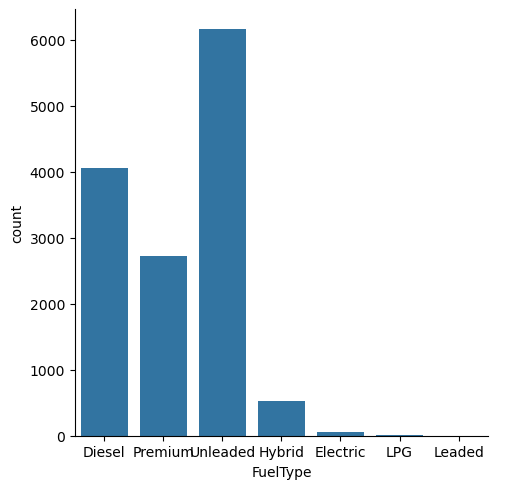

In [35]:
sns.catplot(data=df,x='FuelType',kind='count')

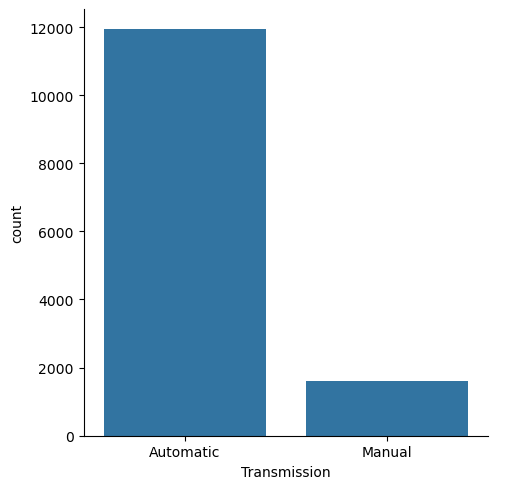

In [36]:
sns.catplot(data=df,x='Transmission',kind='count')

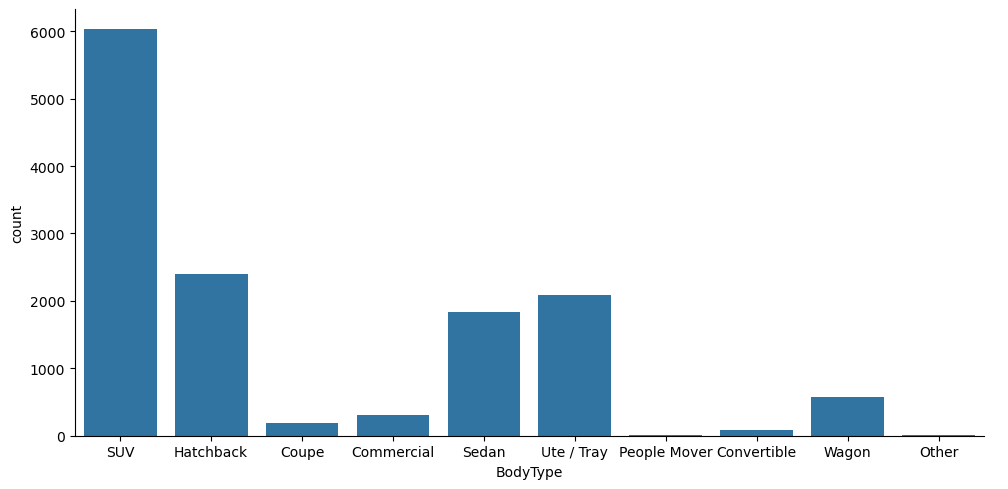

In [37]:
sns.catplot(data=df,x='BodyType',kind='count',height=5,aspect=2)

In [38]:
df1= df.drop(['Brand','Year','Model'], axis=1)

In [39]:
df1= pd.get_dummies(df1)

In [40]:
df1.head()

,Displacement,FuelConsumption,Kilometres,Cylinders,Doors,Seats,Price,UsedOrNew_DEMO,UsedOrNew_NEW,UsedOrNew_USED,...,BodyType_Commercial,BodyType_Convertible,BodyType_Coupe,BodyType_Hatchback,BodyType_Other,BodyType_People Mover,BodyType_SUV,BodyType_Sedan,BodyType_Ute / Tray,BodyType_Wagon
0,2.2,8.7,5595.0,4,4,7,51990.0,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1.5,6.7,16.0,4,5,5,19990.0,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,5.5,11.0,136517.0,8,2,4,32990.0,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,1.3,6.0,1035.0,4,4,5,34990.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,2.0,5.1,67662.0,4,2,4,62280.0,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [41]:
y= df1['Price']
x= df1.drop(['Price'], axis =1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred=lr.predict(x_test)

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.648745612751902

In [47]:
r2_score(y_train,lr.predict(x_train))

0.6517845604662945

In [48]:
from sklearn.tree import DecisionTreeRegressor
Dtree=DecisionTreeRegressor()
Dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
y_pred_dtree=Dtree.predict(x_test)


In [50]:
y_pred_train_dtree=Dtree.predict(x_train)
r2_score(y_train,y_pred_train_dtree)

0.9995485736965375

In [51]:
y_pred_test_dtree=Dtree.predict(x_test)
r2_score(y_test,y_pred_test_dtree)

0.6954588476797953

In [52]:
## Random forest
from sklearn.ensemble import RandomForestRegressor
Rforest=RandomForestRegressor()
Rforest.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
y_pred_dtree=Rforest.predict(x_test)
y_pred_train_Rforest=Rforest.predict(x_train)
r2_score(y_train,y_pred_train_dtree)

0.9995485736965375

In [54]:
y_pred_test_Rforest=Rforest.predict(x_test)

In [55]:
r2_score(y_test,y_pred_test_dtree)

0.6954588476797953

In [56]:
## bagging classifier and random forest
from sklearn.ensemble import BaggingRegressor

In [57]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)

In [58]:
r2_score(y_train,bag.predict(x_train))

0.9658295020311785

In [59]:
r2_score(y_test,y_pred)

0.8073659806018725

In [60]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [61]:
ri=Ridge(alpha=0.1)
ri.fit(x_train,y_train)

Ridge(alpha=0.1)

In [62]:
y_pred_ri=ri.predict(x_test)

In [63]:
r2_score(y_test,y_pred_ri)


0.6487524905704114

In [64]:
r2_score(y_train,ri.predict(x_train))

0.651783345366823

In [65]:
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)

Lasso(alpha=0.1)

In [66]:
y_pred_la=la.predict(x_test)

In [67]:
r2_score(y_test,y_pred_ri)

0.6487524905704114

In [68]:
r2_score(y_train,la.predict(x_train))

0.6517841484353941

In [69]:
data = {
    'Algorithm': ['linear Regression', 'Decision Tree','Random Forest','Bagging','Ridge','Lasso'],
    'Training_accuracy': [65,99,99,96,65,64],
    'Testing_accuracy': [64,69,69,80,64,64]
}

# Create DataFrame
df1 = pd.DataFrame(data)

# Display the DataFrame
display(df1)

,Algorithm,Training_accuracy,Testing_accuracy
0,linear Regression,65,64
1,Decision Tree,99,69
2,Random Forest,99,69
3,Bagging,96,80
4,Ridge,65,64
5,Lasso,64,64


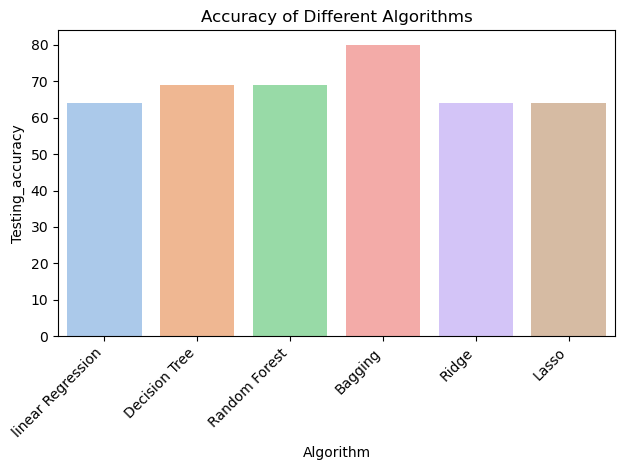

In [70]:
# Plot the bar graph
plt.figure()
sns.barplot(x='Algorithm', y='Testing_accuracy', data=df1, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('Testing_accuracy')
plt.title('Accuracy of Different Algorithms')
plt.tight_layout()

# Show the plot
plt.show()

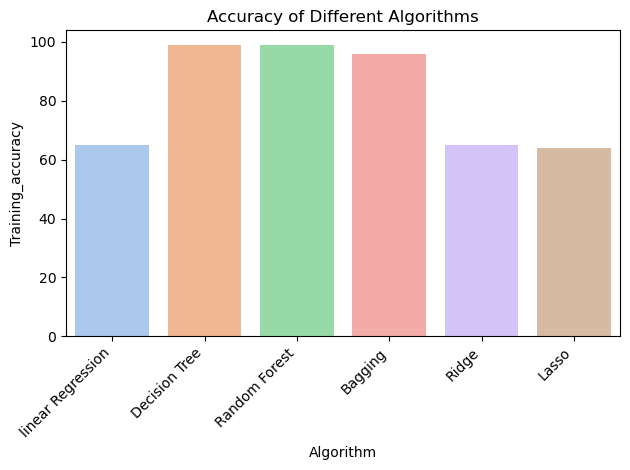

In [124]:
# Plot the bar graph
plt.figure()
sns.barplot(x='Algorithm', y='Training_accuracy', data=df1, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('Training_accuracy')
plt.title('Accuracy of Different Algorithms')
plt.tight_layout()

# Show the plot
plt.show()